In [3]:
from GateLibrary2 import pauli_gates
import GateLibrary2 as gl
import sympy as sp
import matplotlib.pyplot as plt
from sympy.physics.quantum import Dagger, TensorProduct
from sympy import Matrix, N
import numpy as np

In [4]:
a = 1
b = 0
c = 0
rho_t = (1/2)*(pauli_gates[0] + a*pauli_gates[1] + b*pauli_gates[2] + c*pauli_gates[3])
p_strength = [1/4,1/4,1/4,1/4]
q_strength = [1/4,1/4,1/4,1/4]

In [5]:
def Holevo_cap(rho_t,p_strength,q_strength):
    ket_plus = Matrix([[1/sp.sqrt(2)],[1/sp.sqrt(2)]])
    ket_minus = Matrix([[1/sp.sqrt(2)],[-1/sp.sqrt(2)]])

    output_state = Matrix([[0 for i in range(4)] for j in range(4)])
    for i in range(4):
        for j in range(4):
            commutator = pauli_gates[i]*pauli_gates[j]-pauli_gates[j]*pauli_gates[i]
            anticommutator = pauli_gates[i]*pauli_gates[j]+pauli_gates[j]*pauli_gates[i]
            if (commutator == Matrix([[0 for i in range(2)] for j in range(2)])):
                #Eksperimen gimana kalau kita pake \sqrt{p} dan \sqrt{q}
                #output_state += (p_strength[i]**0.5)*(q_strength[j]**0.5)*TensorProduct(ket_plus*Dagger(ket_plus),anticommutator*rho_t*Dagger(anticommutator))
                #Eksperimen gimana kalau kita pake p^2 dan q^2
                output_state += (p_strength[i]**2)*(q_strength[j]**2)*TensorProduct(ket_plus*Dagger(ket_plus),anticommutator*rho_t*Dagger(anticommutator))
                #Ini yang sesuai dengan Goswami
                #output_state += p_strength[i]*q_strength[j]*TensorProduct(ket_plus*Dagger(ket_plus),anticommutator*rho_t*Dagger(anticommutator))
            elif (anticommutator == Matrix([[0 for i in range(2)] for j in range(2)])):
                #Eksperimen gimana kalau kita pake \sqrt{p} dan \sqrt{q}
                #output_state += (p_strength[i]**0.5)*(q_strength[j]**0.5)*TensorProduct(ket_plus*Dagger(ket_plus),anticommutator*rho_t*Dagger(anticommutator))
                #Eksperimen gimana kalau kita pake p^2 dan q^2
                output_state += (p_strength[i]**2)*(q_strength[j]**2)*TensorProduct(ket_minus*Dagger(ket_minus),commutator*rho_t*Dagger(commutator))
                #Ini yang sesuai dengan Goswami
                #output_state += p_strength[i]*q_strength[j]*TensorProduct(ket_minus*Dagger(ket_minus),commutator*rho_t*Dagger(commutator))
            else:
                raise Exception('This is not supposed to happen')
    

    rho_c_tilde = Matrix([[output_state[0,0]+output_state[1,1],output_state[0,2]+output_state[1,3]],[output_state[2,0]+output_state[3,1],output_state[2,2]+output_state[3,3]]])

    #Cari eigen value dari output state dan \tilde{\rho}_c
    Eigen_value = output_state.eigenvals()
    EigValC = rho_c_tilde.eigenvals()

    keys = gl.get_keys(Eigen_value)
    keys_c = gl.get_keys(EigValC)

    H_output = gl.vonNeumann(keys)
    H_c = gl.vonNeumann(keys_c)

    Holevo_cap = 1 + H_c - H_output

    return Holevo_cap



In [6]:
N(Holevo_cap(rho_t,p_strength,q_strength))

0.835168723752165 - 1.8703951468908e-34*I

c:\Users\cahya\anaconda3\envs\SymbolicComputation\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


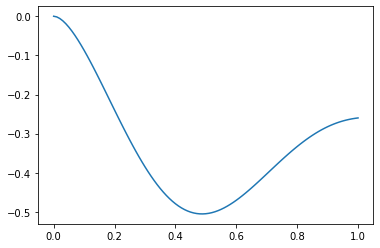

In [7]:
q_strength = np.arange(0.0,1.01,0.01)
Holevo_capacities = np.zeros(len(q_strength),dtype = complex)
rho_t

for i in range(len(q_strength)):
    q=q_strength[i]
    dep_q_strength = [1-(3*q/4),q/4,q/4,q/4]
    Holevo_capacities[i] = Holevo_cap(rho_t,dep_q_strength,dep_q_strength)

plt.plot(q_strength,np.log2(Holevo_capacities))


In [8]:
print(Holevo_capacities)

[1.        -6.18824955e-32j 0.99885915+0.00000000e+00j
 0.99604915+0.00000000e+00j 0.99195581+0.00000000e+00j
 0.98680684+0.00000000e+00j 0.98077209+0.00000000e+00j
 0.97398896+0.00000000e+00j 0.96657351+0.00000000e+00j
 0.95862636+0.00000000e+00j 0.95023625+0.00000000e+00j
 0.94148246+0.00000000e+00j 0.93243635+0.00000000e+00j
 0.92316265+0.00000000e+00j 0.9137203 +0.00000000e+00j
 0.90416318+0.00000000e+00j 0.89454067+0.00000000e+00j
 0.88489807+0.00000000e+00j 0.87527702+0.00000000e+00j
 0.8657158 +0.00000000e+00j 0.85624958+0.00000000e+00j
 0.84691064+0.00000000e+00j 0.83772864+0.00000000e+00j
 0.8287307 +0.00000000e+00j 0.81994162+0.00000000e+00j
 0.81138402+0.00000000e+00j 0.8030784 +0.00000000e+00j
 0.79504332+0.00000000e+00j 0.78729549+0.00000000e+00j
 0.77984981+0.00000000e+00j 0.77271953+0.00000000e+00j
 0.76591629+0.00000000e+00j 0.75945017+0.00000000e+00j
 0.75332982+0.00000000e+00j 0.74756247+0.00000000e+00j
 0.74215402+0.00000000e+00j 0.73710907+0.00000000e+00j
 0.7324310

In [9]:
log_Holevo = np.log2(Holevo_capacities)
log_Holevo

array([ 2.76235939e-63-8.92775694e-32j, -1.64684355e-03+0.00000000e+00j,
       -5.71116059e-03+0.00000000e+00j, -1.16522374e-02+0.00000000e+00j,
       -1.91603726e-02+0.00000000e+00j, -2.80101758e-02+0.00000000e+00j,
       -3.80226811e-02+0.00000000e+00j, -4.90486415e-02+0.00000000e+00j,
       -6.09594911e-02+0.00000000e+00j, -7.36418443e-02+0.00000000e+00j,
       -8.69938823e-02+0.00000000e+00j, -1.00922848e-01+0.00000000e+00j,
       -1.15343243e-01+0.00000000e+00j, -1.30175490e-01+0.00000000e+00j,
       -1.45344926e-01+0.00000000e+00j, -1.60781027e-01+0.00000000e+00j,
       -1.76416814e-01+0.00000000e+00j, -1.92188393e-01+0.00000000e+00j,
       -2.08034599e-01+0.00000000e+00j, -2.23896727e-01+0.00000000e+00j,
       -2.39718337e-01+0.00000000e+00j, -2.55445104e-01+0.00000000e+00j,
       -2.71024732e-01+0.00000000e+00j, -2.86406893e-01+0.00000000e+00j,
       -3.01543209e-01+0.00000000e+00j, -3.16387261e-01+0.00000000e+00j,
       -3.30894617e-01+0.00000000e+00j, -3.45022888

c:\Users\cahya\anaconda3\envs\SymbolicComputation\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


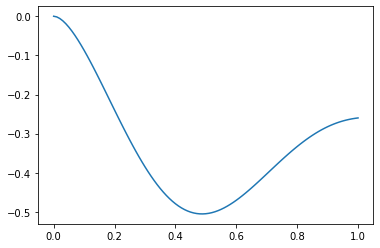

In [10]:
plt.plot(q_strength,log_Holevo)